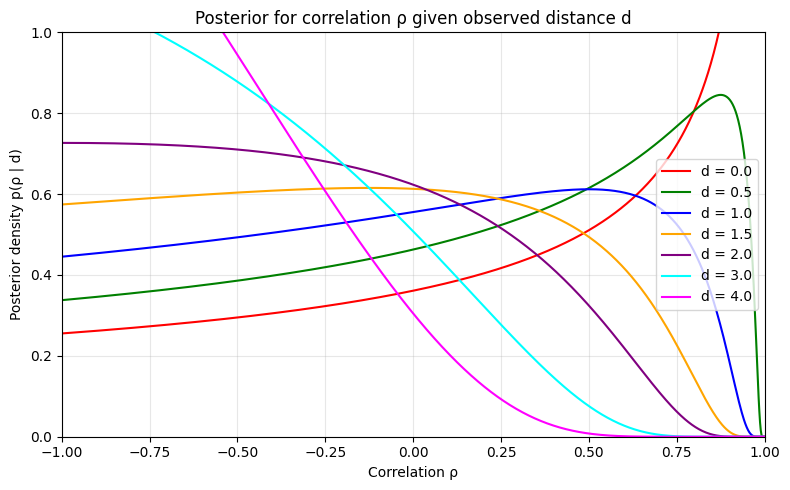

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Posterior for correlation ρ given one observed difference d
# Model: D ~ N(0, 2σ²(1−ρ)), with uniform prior on ρ ∈ (−1,1)
def posterior_rho(rho, d_over_sigma):
    # avoid numerical overflow near rho→1
    rho = np.clip(rho, -0.999, 0.999)
    p = (1 - rho)**(-0.5) * np.exp(- (d_over_sigma**2) / (4 * (1 - rho)))
    p[rho <= -1] = 0
    p[rho >= 1] = 0
    return p

# Range of ρ and chosen d/σ values
rho = np.linspace(-0.999, 0.999, 1000)
d_values = [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
colors= ['r','g','b','orange','purple','cyan','magenta']
plt.figure(figsize=(8,5))
for id,d in enumerate(d_values):
    p = posterior_rho(rho, d)
    p /= np.trapezoid(p, rho)  # normalize to make it a valid pdf
    plt.plot(rho, p, label=f'd = {d}', color=colors[id])

plt.ylim([0,1])
plt.xlim([-1,1])
plt.xlabel('Correlation ρ')
plt.ylabel('Posterior density p(ρ | d)')
plt.title('Posterior for correlation ρ given observed distance d')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
